<a href="https://colab.research.google.com/github/vishwesh1010/Earning-call-Analysis/blob/main/EarningCallAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!pip install SentimentAnalysis
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from AnalyseSentiment.AnalyseSentiment import AnalyseSentiment
from spacy.parts_of_speech import PROPN
from google.colab import drive
from itertools import chain
from textblob import TextBlob
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import os
import urllib.request
urllib.request.urlretrieve('https://utdallas.box.com/s/9eysl70cp22h4kgcaq02hyafpsg9iyo9', 'data.txt')


('data.txt', <http.client.HTTPMessage at 0x7f12731d7090>)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
f = open('data.txt', 'r')
content = f.read()

In [ ]:
data = content.split('\n')
len(data)

114

##              Preprocessing Text Data using Spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def is_proper_noun(token):
    if token.doc.is_tagged is False:  # check if the document was POS-tagged
        raise ValueError('token is not POS-tagged')

    return token.pos == PROPN

In [ ]:
 def is_token_allowed(token):
     '''Only allow valid tokens which are not stop words and punctuation symbols.'''
     if (not token or not token.string.strip() or
         token.is_stop or token.is_punct or is_proper_noun(token)):
         return False
     return True


In [ ]:
 def preprocess_token(token):
     # Reduce token to its lowercase lemma form
     return token.lemma_.strip().lower()


In [ ]:
 list_complete_tokens = []
 for i in data: 
  complete_doc = nlp(i)
  filtered_tokens = [preprocess_token(token) for token in complete_doc if is_token_allowed(token)]
  list_complete_tokens.append(filtered_tokens)

In [ ]:
abc = list(chain.from_iterable(list_complete_tokens))

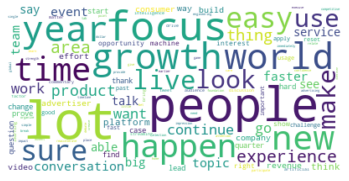

In [ ]:
# Summarizing the whole year.
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(abc))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Determing the Sentiments using Analyse Sentiment Library**

In [ ]:
positive = []
negative = []
neutral = []
obj = AnalyseSentiment()

for sentence in abc:
  dataf = obj.Analyse(sentence)
  target = dataf['overall_sentiment']
  if target == 'Positive' : positive.append(sentence)
  elif target == 'Negative' : negative.append(sentence)
  else:neutral.append(sentence)

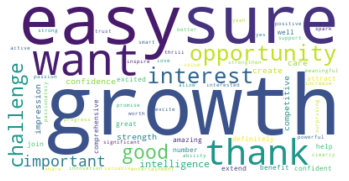

In [ ]:
#Positive Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(positive))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

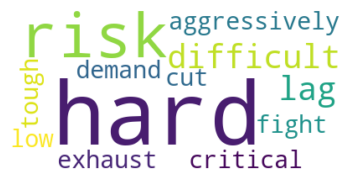

In [ ]:
#Negative Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(negative))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

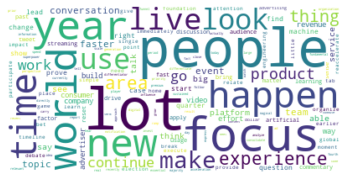

In [ ]:
#Neutral Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(neutral))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

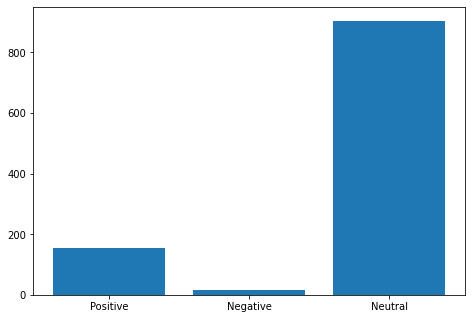

In [ ]:
#Distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positive', 'Negative', 'Neutral']
students = [len(positive), len(negative), len(neutral)]
ax.bar(langs,students)
plt.show()

## **Determing the Sentiments using TextBlob Sentiment Library**

In [ ]:
positive = []
negative = []
neutral = []
for sentence in list_complete_tokens:
  testimonial = TextBlob(' '.join(sentence))
  if testimonial.sentiment.polarity >= 0.4:
      positive.extend(sentence)
  elif testimonial.sentiment.polarity <= -0.4:
      negative.extend(sentence)
  else:
      neutral.extend(sentence)

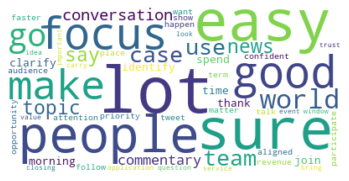

In [ ]:
#Positive Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(positive))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

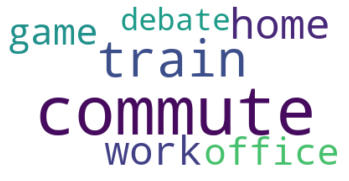

In [ ]:
#Negative Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(negative))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

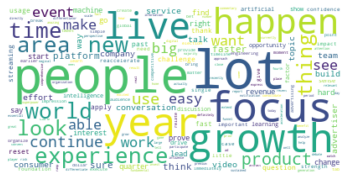

In [ ]:
#Neutral Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(neutral))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

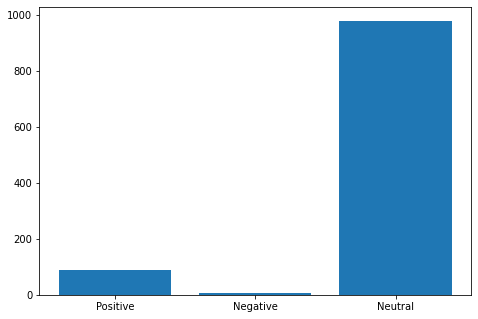

In [ ]:
#Distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positive', 'Negative', 'Neutral']
students = [len(positive),len(negative),len(neutral)]
ax.bar(langs,students)
plt.show()

## **Prepocessing using WordNet**

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_d = []
lemmatizer = WordNetLemmatizer()
for sentence in data:

  #Removing Punctuation
  sentence = re.sub(r'[^\w\s]','',sentence)

  #Word Tokenzing
  word_tokens = word_tokenize(sentence)

  #Removing Stop Words
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
  #Lemmatizing
  lemma = []
  for word in filtered_sentence:
    lemma.append(lemmatizer.lemmatize(word))
  filtered_d.append(' '.join(lemma))


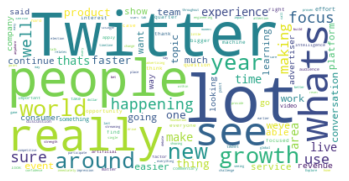

In [ ]:
# Summarizing the whole year.
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(filtered_d))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Determing the Sentiments using Analyse Sentiment Library**

In [ ]:
positive = []
negative = []
neutral = []
obj = AnalyseSentiment()

for sentence in filtered_d:
  dataf = obj.Analyse(sentence)
  target = dataf['overall_sentiment']
  if target == 'Positive' : positive.append(sentence)
  elif target == 'Negative' : negative.append(sentence)
  else:neutral.append(sentence)

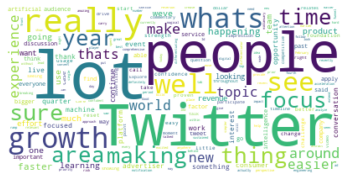

In [ ]:
#Positive Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(positive))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

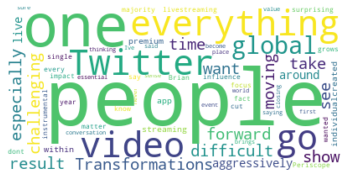

In [ ]:
#Negative Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(negative))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

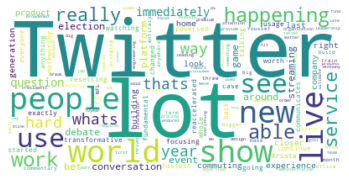

In [ ]:
#Neutral Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(neutral))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

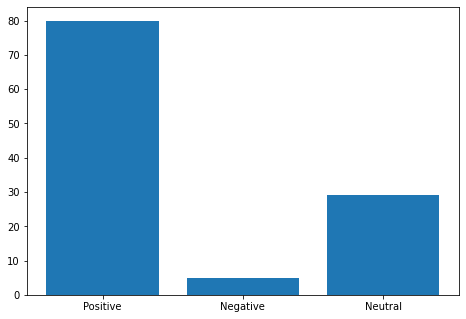

In [ ]:
#Distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positive', 'Negative', 'Neutral']
students = [len(positive),len(negative),len(neutral)]
ax.bar(langs,students)
plt.show()

## **Determing the Sentiments using TextBlob Sentiment Library**

In [ ]:
positive = []
negative = []
neutral = []
for sentence in filtered_d:
  testimonial = TextBlob(sentence)
  if testimonial.sentiment.polarity >= 0.33:
      positive.extend(sentence.split())
  elif testimonial.sentiment.polarity <= -0.33:
      negative.append(sentence.split())
  else:
      neutral.extend(sentence.split())

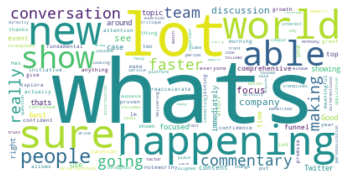

In [ ]:
#Positive Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(positive))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

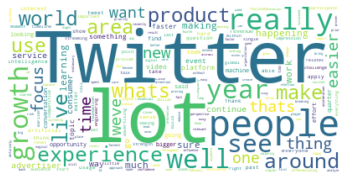

In [ ]:
#Neutral Notes
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(neutral))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

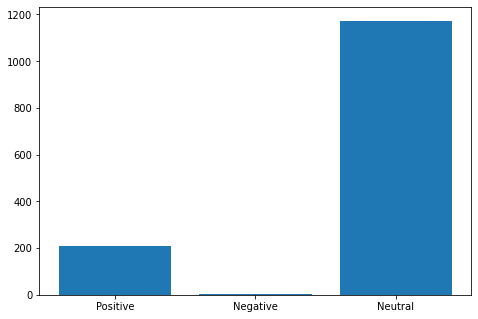

In [ ]:
#Distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positive', 'Negative', 'Neutral']
students = [len(positive),len(negative),len(neutral)]
ax.bar(langs,students)
plt.show()